In [14]:
import pandas as pd

posts_df = pd.read_csv('cleaned_posts.csv')

posts_df.head()

,postID,originalContent,date,link,sentiment,totalLikes,totalReplies,replyToPostID,taggedSymbols,username,userid,totalImages,totalSymbols
0,29104030,Vkl luôn,2024-11-06T21:39:23.267+07:00,NaN,0,1,0,NaN,"[{'symb': '^DJI', 'price': 43496.43}]",Hoàng,5ededf24-12f7-41d9-b390-08ff631fc275,0,1
1,29104026,Đ.ịt cụ thằng Khải Trần hô VNI sập về 900 lần ...,2024-11-06T21:39:05.22+07:00,NaN,0,0,0,NaN,[],Datbg10,73778567-ec61-43eb-b3a0-b4a651b8bd3f,0,0
2,29104024,Tăng 1 phát bằng vn làm hai mấy năm :)),2024-11-06T21:39:04.077+07:00,NaN,0,12,2,NaN,"[{'symb': '^DJI', 'price': 43506.86}]",Trung Tuyến,5d597f38-3b24-4f40-952c-2b3f9be8e7d5,0,1
3,29104021,Má đáng full tiền...đau,2024-11-06T21:38:52.277+07:00,NaN,0,0,1,NaN,"[{'symb': 'VNINDEX', 'price': 1261.28}]",Duc Nguyen,225659c6-cf18-4e93-aa39-a294bae5b784,1,1
4,29104019,Gap khủng long,2024-11-06T21:38:49.99+07:00,NaN,0,2,0,NaN,"[{'symb': '^DJI', 'price': 43499.54}]",BINH NHI,da8ebfa2-9cd5-4dbf-84cd-9567f694f681,0,1


In [15]:
import string
stop_words = pd.read_csv('vietnamese-stopwords.csv')
stop_words = stop_words['word'].tolist()
stop_words = set(stop_words)

def preprocess_text_optimized(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return ' '.join(word for word in text.split() if word not in stop_words)



In [35]:
post_content = posts_df[['username', 'userid','postID', 'originalContent', 'sentiment']]
# remove contents contains link only
post_content = post_content[~post_content['originalContent'].str.match(r'^\s*(http|https|www\.).*$', na=False)]
post_content.dropna(inplace=True)

post_content['originalContent'] = post_content['originalContent'].apply(preprocess_text_optimized)

In [36]:
cursed_words_list = pd.read_csv('Vietnamese_cursed_words.txt')
cursed_words_list = cursed_words_list['word'].tolist()

# remove space in the beginning and end of the word
cursed_words_list = [word.strip() for word in cursed_words_list]
cursed_words_list = set(cursed_words_list)
print(cursed_words_list)

{'dell được', 'đụ cha', 'hãm', 'ke mia', 'dellnoinhieu', 'mệt mỏi', 'chán', 'láo chó', 'cứk', 'điếm', 'quá đáng', 'sủa càn', 'nghi ngờ', 'hèn', 'chet mia', 'đầu bùi', 'mất dạy', 'cờ hó', 'bo mje', 'mẹ cha anh', 'bất mãn', 'đéo', 'dis mia', 'dilon', 'cuk', 'dell làm', 'tổ cha', 'ditmemay', 'mất dậy', 'địt cha', 'vãi', 'kệ mịe', 'vailon', 'matlon', 'ke mje', 'dilol', 'dell nghe', 'dmcs', 'giận', 'dell biet', 'đis mịa', 'con dời', 'ditmecondi', 'caiconcak', 'dell nói', 'đau khổ', 'địt má', 'dell di', 'bỏ mịe', 'vai lon', 'lollll', 'đù mịa', 'dau boi', 'đĩ', 'kac', 'dell an', 'cutcut', 'đú cha', 'cu', 'đụ bà', 'đề ma ma', 'đậu mẹ', 'con chó', 'cười ẻ', 'mả mẹ', 'đề mama', 'dismje', 'sủa bậy', 'chết mẹ', 'đú mẹ', 'đủ mia', 'dell ăn', 'lồn', 'daubuoi', 'vai lol', 'kệ mịa', 'ditmecondicho', 'bố láo', 'cứt', 'thằng chó', 'dmmmm', 'địt mía', 'dell chạy', 'địt con', 'thù hận', 'thất bại', 'đmmmmm', 'chet mie', 'bỏ mẹ', 'kệ mja', 'tiên sư bố', 'đm', 'tệ hại', 'đù má', 'chó má', 'bất an', 'đụ', 'm

In [37]:
def count_cursed_words(text):
    count = 0
    for word in text.split():
        if word in cursed_words_list:
            count += 1
    return count
post_content['cusred_words_count'] = post_content['originalContent'].apply(count_cursed_words)
post_content

,username,userid,postID,originalContent,sentiment,cusred_words_count
0,Hoàng,5ededf24-12f7-41d9-b390-08ff631fc275,29104030,vkl,0,1
1,Datbg10,73778567-ec61-43eb-b3a0-b4a651b8bd3f,29104026,địt cụ thằng khải trần hô vni sập 900 100,0,1
2,Trung Tuyến,5d597f38-3b24-4f40-952c-2b3f9be8e7d5,29104024,1 phát vn hai,0,0
3,Duc Nguyen,225659c6-cf18-4e93-aa39-a294bae5b784,29104021,má full tiềnđau,0,0
4,BINH NHI,da8ebfa2-9cd5-4dbf-84cd-9567f694f681,29104019,gap khủng long,0,0
...,...,...,...,...,...,...
272974,NTH,eed1b1ff-a87b-43a8-acf3-60605631cd8e,28008015,vc,0,0
272975,Xuân Phú,69659543-c04f-4f3d-9b7b-2543d3f4e4a7,28008013,chết dập chết dụi hic,0,2
272976,Hồ Đồng,8087c7d2-960f-4160-b0c0-4dc782d02a12,28008006,múc rũ đỉnh,0,0
272977,Diệt Chim Lợn Chó,f2133134-296f-4572-90fc-6cb4a81cf7d6,28008001,đừng mong rẻ ní đỏ xanh bán line,0,0


In [38]:
post_content['cusred_words_count'].value_counts()

cusred_words_count
0     238624
1      26289
2       4907
3       1279
4        437
5        174
6         98
7         55
8         20
9         11
11         7
10         7
12         6
13         2
14         2
15         2
19         1
Name: count, dtype: int64

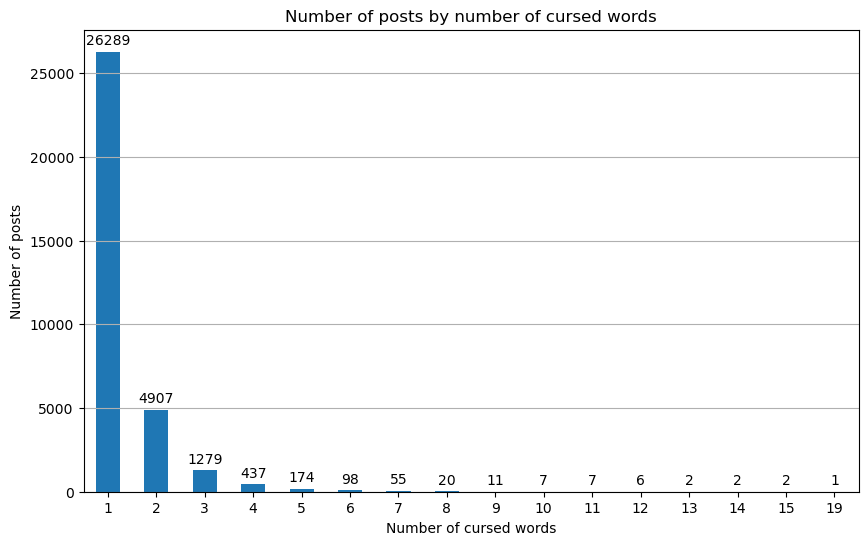

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
bars = post_content.loc[post_content['cusred_words_count'] != 0, 'cusred_words_count'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of cursed words')
plt.ylabel('Number of posts')
plt.title('Number of posts by number of cursed words')

# add number on top of each columns
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()


In [40]:
# draw a pie chart showing the percentage of posts containing cursed words(positive posts, negative posts, neutral posts)
post_content['has_cursed_words'] = post_content['cusred_words_count'] > 0
post_content['sentiment'] = post_content['sentiment'].fillna(0)


total_cursed_words_posts = post_content['has_cursed_words'].sum()
total_cursed_words_posts


33297

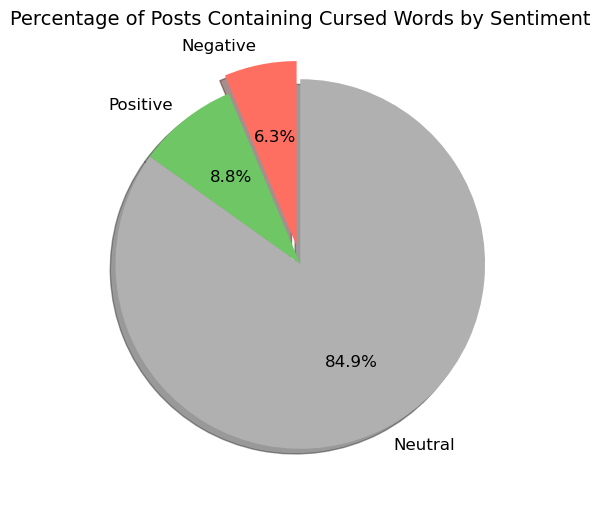

In [41]:
import matplotlib.pyplot as plt

# Data
negative_cursed_posts = post_content[post_content['sentiment'] == -1]['has_cursed_words'].sum()
positive_cursed_posts = post_content[post_content['sentiment'] == 1]['has_cursed_words'].sum()
neutral_cursed_posts = post_content[post_content['sentiment'] == 0]['has_cursed_words'].sum()

# Labels and data
labels = ['Negative', 'Positive', 'Neutral']
sizes = [negative_cursed_posts, positive_cursed_posts, neutral_cursed_posts]
colors = ['#FF6F61', '#6EC664', '#B0B0B0']  # Red, green, gray
explode = (0.1, 0, 0)  # Explode the first slice (Negative)

# Plot
plt.figure(figsize=(8, 6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 12},  # Font size for labels
)
plt.title('Percentage of Posts Containing Cursed Words by Sentiment', fontsize=14)
plt.show()


In [44]:
user_activity = post_content.groupby('userid').agg(
    user_name = ('username', 'first'),
    total_posts=('postID', 'count'),
    total_cursed_posts=('has_cursed_words', 'sum'),
    total_negative_posts=('sentiment', lambda x: (x == -1).sum()),
    total_positive_posts=('sentiment', lambda x: (x == 1).sum()),
    total_neutral_posts=('sentiment', lambda x: (x == 0).sum())
).reset_index()
user_activity

,userid,user_name,total_posts,total_cursed_posts,total_negative_posts,total_positive_posts,total_neutral_posts
0,0001a16a-5b22-452b-9d3a-8bdeb5bb7b6e,BUFFALO SUPER,12,3,10,0,2
1,00029205-5720-49ed-9228-0c697188c706,123go!,6,0,0,0,6
2,0004aa83-f758-40a0-84a7-09722f8ef181,Trần Thủ Độ,5,1,0,0,5
3,000bf1ef-f711-43f7-a5ad-df9bee5d3530,linh thảo,1,1,0,0,1
4,000fb89b-2583-4b9c-b6c7-d80bf0434a8b,Cá Voi Xanh,4,0,0,0,4
...,...,...,...,...,...,...,...
22535,fff1cb24-3b8c-4833-9a22-1117ef6f696c,Cắt Lỗ Bắt Đáy,1,0,0,0,1
22536,fff1f776-006d-40c7-8617-16c2c1f9aad3,Tạ Long,2,1,0,0,2
22537,fffbd3d5-840a-4dff-b109-21a464fcd007,Bán chậm-Mua chậm,3,0,0,0,3
22538,fffd4ccd-3481-48d6-a641-21ded4843d9b,mua đáy bán đỉnh,17,4,0,0,17


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4924\1466123670.py:36: UserWarning: Glyph 12644 (\N{HANGUL FILLER}) missing from current font.
  plt.tight_layout()  # Adjust layout to prevent overlap
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4924\1466123670.py:36: UserWarning: Glyph 128405 (\N{REVERSED HAND WITH MIDDLE FINGER EXTENDED}) missing from current font.
  plt.tight_layout()  # Adjust layout to prevent overlap


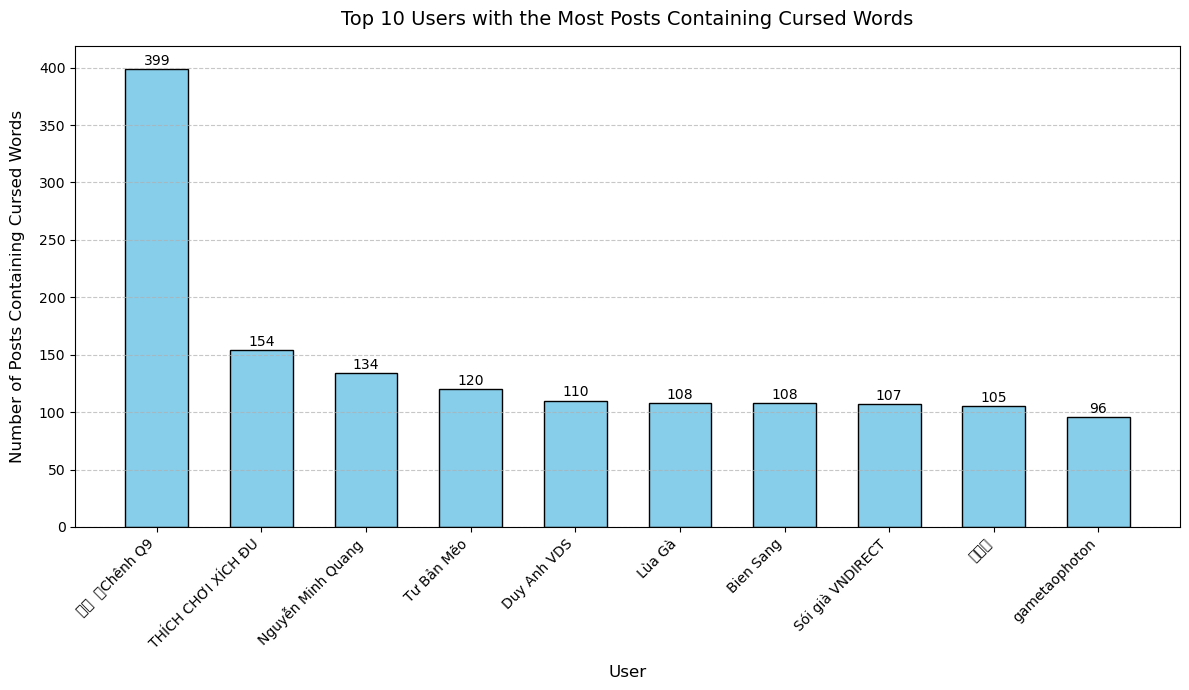

In [47]:
import matplotlib.pyplot as plt

# Sort the data and select the top 10 users
top_users = user_activity.sort_values('total_cursed_posts', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 7))
bars = plt.bar(
    top_users['user_name'],
    top_users['total_cursed_posts'],
    color='skyblue',
    edgecolor='black',
    width=0.6,
)

# Add labels on top of each bar
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate
        bar.get_height() + 1,  # y-coordinate (slightly above the bar)
        f"{int(bar.get_height())}",  # Label text
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10,
    )

# Customize axes and title
plt.xlabel('User', fontsize=12, labelpad=10)
plt.ylabel('Number of Posts Containing Cursed Words', fontsize=12, labelpad=10)
plt.title('Top 10 Users with the Most Posts Containing Cursed Words', fontsize=14, pad=15)
plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotate user names for readability
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines for clarity

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [50]:
print(top_users['user_name'].tolist())

['   ㅤㅤ  ㅤChênh Q9', 'THÍCH CHƠI XÍCH ĐU', 'Nguyễn Minh Quang', 'Tư Bản Mẽo', 'Duy Anh VDS', 'Lùa Gà', 'Bien Sang', 'Sói già VNDIRECT', '🖕🖕🖕', 'gametaophoton']


In [61]:
replies_df = pd.read_csv('cleaned_replies.csv')
print(len(replies_df))

75510


In [62]:
replies_content = replies_df[['username', 'userid', 'postID', 'originalContent']]
replies_content

,username,userid,postID,originalContent
0,NDC,028e4d25-5631-4f3f-8f72-235eabaef9ba,29100636,Bác có thể đưa ra kịch bản rằng : Họ sai!\nSố ...
1,Alex,d0a457ea-b787-4263-bdd1-0e8d0bfc63d9,29100614,"Sao số liệu tự doanh mỗi nơi mỗi khác nhỉ, nay..."
2,Upgrading to Fo,3cc4dffe-ac35-4ac8-95d8-6eb677353d5d,29100602,hiện basic cạn cả cung cả cầu. Nn thoát basic ...
3,NDC,028e4d25-5631-4f3f-8f72-235eabaef9ba,29100595,:)) bác lại chuẩn bài quá đó.
4,Tùng Cận,2b323870-af46-471a-aee7-bd28a23990e2,29100584,"rõ ràng phải có chữ NẾU, lỡ ko đc còn có cái m..."
...,...,...,...,...
75505,Lượng VPA,d18efa81-cdae-4b02-96c8-9dc7eeb85789,28005671,☎Lh đầu tư SĐT/Zalo: 0934 318 921
75506,Lượng VPA,d18efa81-cdae-4b02-96c8-9dc7eeb85789,28005666,A.C tham gia cộng đồng Lượng VPA🕊 ở đây nhé👇
75507,Lượng VPA,d18efa81-cdae-4b02-96c8-9dc7eeb85789,28005646,3•\tKhuyến nghị\nBÁN CHỐT LỜI và QUẢN TRỊ RỦI ...
75508,Lượng VPA,d18efa81-cdae-4b02-96c8-9dc7eeb85789,28005631,2. •\tKhuyến nghị\nBÁN CHỐT LỜI FTS\nGiá bán :...


In [63]:
replies_content = replies_content[~replies_content['originalContent'].str.match(r'^\s*(http|https|www\.).*$', na=False)]
replies_content['originalContent'] = replies_content['originalContent'].apply(preprocess_text_optimized)
replies_content['cusred_words_count'] = replies_content['originalContent'].apply(count_cursed_words)    
replies_content['has_cursed_words'] = replies_content['cusred_words_count'] > 0
replies_content

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4924\3901651923.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replies_content['originalContent'] = replies_content['originalContent'].apply(preprocess_text_optimized)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4924\3901651923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  replies_content['cusred_words_count'] = replies_content['originalContent'].apply(count_cursed_words)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4924\3901651923.py:4: SettingWithCopyW

,username,userid,postID,originalContent,cusred_words_count,has_cursed_words
0,NDC,028e4d25-5631-4f3f-8f72-235eabaef9ba,29100636,thể kịch sai liệu sở giao dịch,0,False
1,Alex,d0a457ea-b787-4263-bdd1-0e8d0bfc63d9,29100614,liệu doanh thống kê td l s,0,False
2,Upgrading to Fo,3cc4dffe-ac35-4ac8-95d8-6eb677353d5d,29100602,hiện basic cạn cung cầu nn thoát basic ròng rả...,2,True
3,NDC,028e4d25-5631-4f3f-8f72-235eabaef9ba,29100595,chuẩn,0,False
4,Tùng Cận,2b323870-af46-471a-aee7-bd28a23990e2,29100584,ràng chữ lỡ đc đổ thừa,0,False
...,...,...,...,...,...,...
75505,Lượng VPA,d18efa81-cdae-4b02-96c8-9dc7eeb85789,28005671,☎lh đầu tư sđtzalo 0934 318 921,0,False
75506,Lượng VPA,d18efa81-cdae-4b02-96c8-9dc7eeb85789,28005666,ac tham gia cộng đồng vpa🕊 nhé👇,0,False
75507,Lượng VPA,d18efa81-cdae-4b02-96c8-9dc7eeb85789,28005646,3• khuyến nghị bán chốt quản trị rủi ro dcm bá...,0,False
75508,Lượng VPA,d18efa81-cdae-4b02-96c8-9dc7eeb85789,28005631,2 • khuyến nghị bán chốt fts bán quanh mốc 434...,0,False


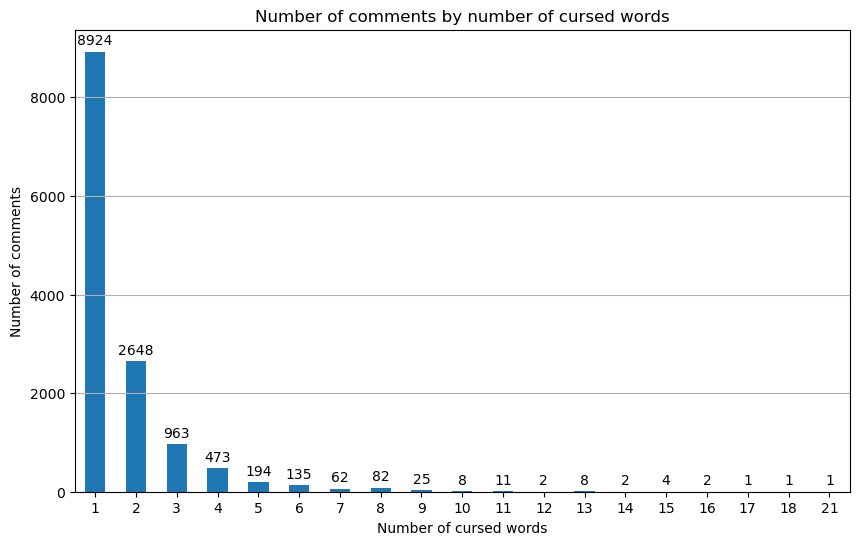

In [64]:
plt.figure(figsize=(10, 6))
bars = replies_content.loc[replies_content['cusred_words_count'] != 0, 'cusred_words_count'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Number of cursed words')
plt.ylabel('Number of comments')
plt.title('Number of comments by number of cursed words')

# add number on top of each columns
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')

plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()


In [65]:
user_replies_activity = replies_content.groupby('userid').agg(
    user_name = ('username', 'first'),
    total_replies=('postID', 'count'),
    total_cursed_replies=('has_cursed_words', 'sum')
).reset_index()

# Sort the data and select the top 10 users
top_users_replies = user_replies_activity.sort_values('total_cursed_replies', ascending=False).head(10)
top_users_replies

,userid,user_name,total_replies,total_cursed_replies
7144,d64c98b5-0ba7-4f55-885b-97ee082d1a64,ㅤㅤ ㅤChênh Q9,660,390
3632,6b946f8e-6687-4882-a583-f08fb494b184,Nhang Nhồ Nhạng,290,206
6988,d1385782-3002-4506-be1d-4fcfc66bff58,Hữu Nam,423,131
4054,788e65f8-c534-4d90-84b4-17065408919c,Chim Lợn Chúa,211,117
4306,7f027f11-5122-4fdc-b136-07253c5a617e,HuyHoang(Big boy),151,117
109,03390697-0463-4396-bd8a-1ce6f2710193,BITCOIN 600K$ (MẠC DANH),270,116
4232,7d07fbd1-8ffa-4b47-bbe5-1545a58aaafb,"Hiệu Quả Đầu Tư 28,9% Từ Đầu Năm :)))",222,109
5486,a16d23ca-6a2d-45c4-8a2d-35a16c6fc537,DADDY,223,90
2870,557ac2ff-814c-49a0-a453-78728ae68859,Sòng Bạc Hợp Pháp,142,89
4407,82754ad3-bf9a-40e6-9afa-c4b47e592b15,Hồi Kết,184,82


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_4924\137253948.py:29: UserWarning: Glyph 12644 (\N{HANGUL FILLER}) missing from current font.
  plt.tight_layout()  # Adjust layout to prevent overlap
C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12644 (\N{HANGUL FILLER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


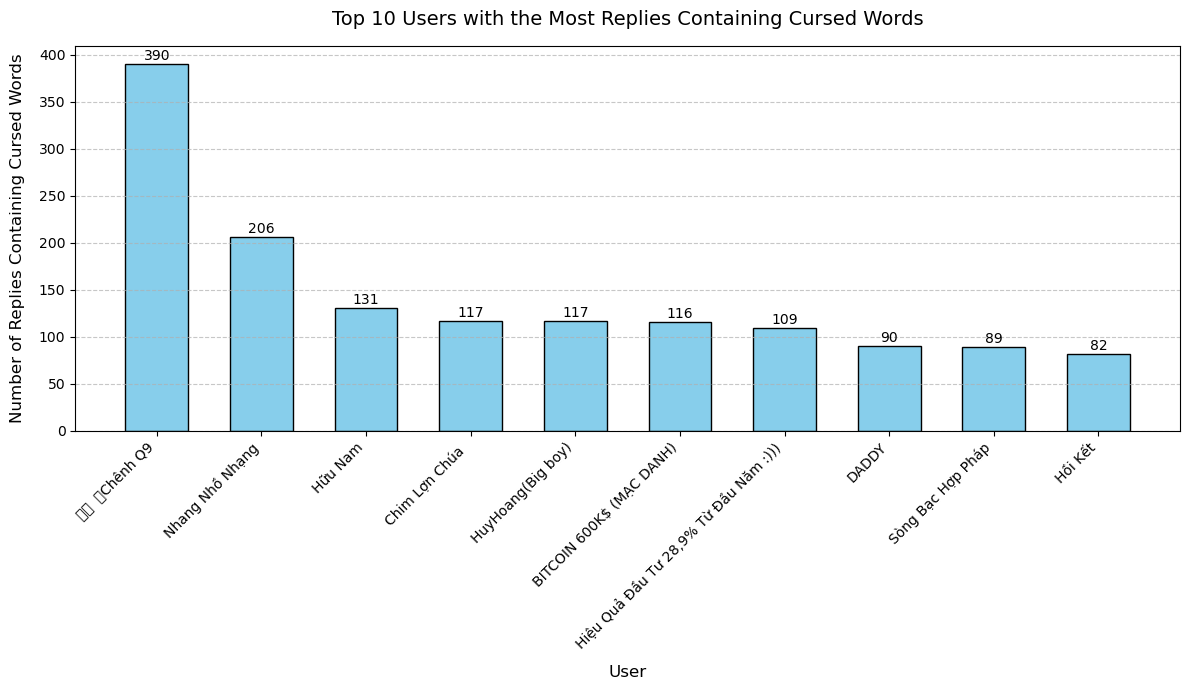

In [66]:
plt.figure(figsize=(12, 7))
bars = plt.bar(
    top_users_replies['user_name'],
    top_users_replies['total_cursed_replies'],
    color='skyblue',
    edgecolor='black',
    width=0.6,
)

# Add labels on top of each bar
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # x-coordinate
        bar.get_height() + 1,  # y-coordinate (slightly above the bar)
        f"{int(bar.get_height())}",  # Label text
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10,
    )

# Customize axes and title
plt.xlabel('User', fontsize=12, labelpad=10)
plt.ylabel('Number of Replies Containing Cursed Words', fontsize=12, labelpad=10)
plt.title('Top 10 Users with the Most Replies Containing Cursed Words', fontsize=14, pad=15)
plt.xticks(rotation=45, fontsize=10, ha='right')  # Rotate user names for readability
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines for clarity

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

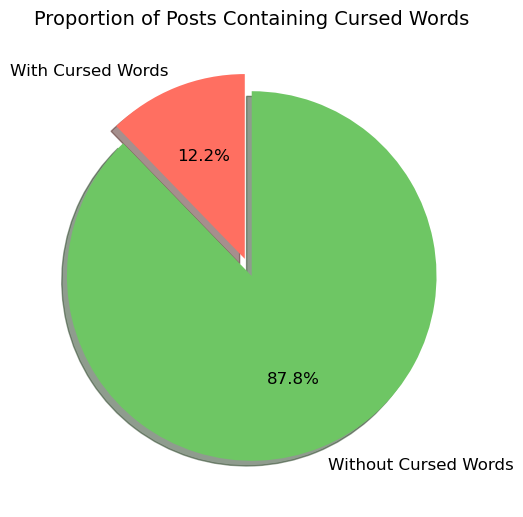

In [68]:
import matplotlib.pyplot as plt

# Data
posts_with_curses = post_content['has_cursed_words'].sum()
posts_without_curses = len(post_content) - posts_with_curses

# Labels and data
labels = ['With Cursed Words', 'Without Cursed Words']
sizes = [posts_with_curses, posts_without_curses]
colors = ['#FF6F61', '#6EC664']  # Red for cursed, green for not cursed

# Plot
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Show percentages with 1 decimal
    startangle=90,  # Start from the top
    colors=colors,
    textprops={'fontsize': 12},  # Label font size
    explode=(0.1, 0),  # Slightly explode the "With Cursed Words" slice
    shadow=True,
)
plt.title('Proportion of Posts Containing Cursed Words', fontsize=14, pad=15)
plt.show()


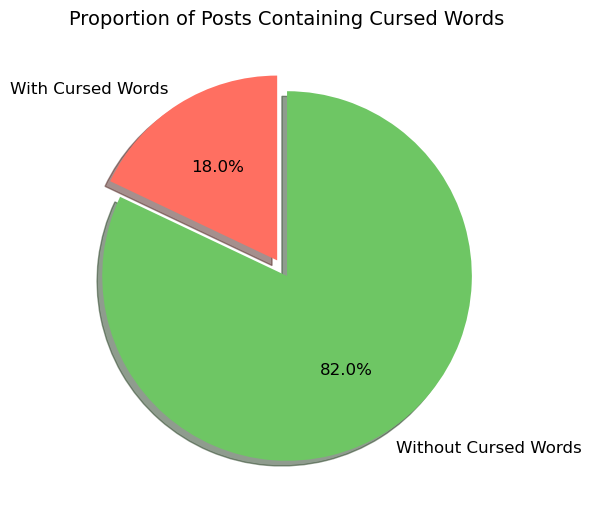

In [69]:
import matplotlib.pyplot as plt

# Data
posts_with_curses = replies_content['has_cursed_words'].sum()
posts_without_curses = len(replies_content) - posts_with_curses

# Labels and data
labels = ['With Cursed Words', 'Without Cursed Words']
sizes = [posts_with_curses, posts_without_curses]
colors = ['#FF6F61', '#6EC664']  # Red for cursed, green for not cursed

# Plot
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Show percentages with 1 decimal
    startangle=90,  # Start from the top
    colors=colors,
    textprops={'fontsize': 12},  # Label font size
    explode=(0.1, 0),  # Slightly explode the "With Cursed Words" slice
    shadow=True,
)
plt.title('Proportion of Posts Containing Cursed Words', fontsize=14, pad=15)
plt.show()
